# Topic Modeling and sentiment analyses 

The data set we will use is a compilation of customer reviews.

# Import the data 

In [70]:
#remove warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import pandas
import pandas as pd
 #Import data
df = pd.read_csv(r"./Reviewssmall.csv", error_bad_lines=False)

In [6]:
#visualize the data 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       10000 non-null  int64 
 1   Summary  10000 non-null  object
 2   Text     10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


,Id,Summary,Text
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


# Data Pre-processing

In [95]:
#Loading nltk libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(3450)

import nltk

In [100]:
# perform lemmatize and stem preprocessing steps on the data set using functions
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

custom_stopwords = STOPWORDS.union(set(['month', 'like', 'buy', 'buying', 'bought', 'product', 'purchase', 'look', 'create', 'expect']))

#edited to be able to extend the gensim.STOPWORDS set
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in custom_stopwords and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [101]:
# Select a document to preview after preprocessing
doc_sample = df.iloc[666].Text

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['I', 'have', 'been', 'using', 'Agave', 'Nectar', 'for', 'several', 'months', 'now', 'and', 'have', 'found', 'it', 'to', 'be', 'a', 'staple', 'in', 'my', 'home.', 'Madhava', 'Agave', 'Nectar', 'is', 'good', 'tasting,', 'it', 'was', 'a', 'good', 'buy!']


 tokenized and lemmatized document: 
['agav', 'nectar', 'month', 'stapl', 'home', 'madhava', 'agav', 'nectar', 'good', 'tast', 'good']


In [102]:
# Preprocess the headline text, saving the results as ‘processed_docs’
processed_docs = df['Text'].map(preprocess)
processed_docs[:30]

0     [vital, can, food, product, good, qualiti, loo...
1     [arriv, label, jumbo, salt, peanut, peanut, ac...
2     [confect, centuri, light, pillowi, citrus, gel...
3     [look, secret, ingredi, robitussin, believ, ad...
4     [great, taffi, great, price, wide, assort, yum...
5     [wild, hair, taffi, order, pound, taffi, enjoy...
6     [saltwat, taffi, great, flavor, soft, chewi, c...
7     [taffi, good, soft, chewi, flavor, amaz, defin...
8     [right, sprout, cat, grass, love, rotat, wheat...
9     [healthi, food, good, digest, good, small, pup...
10    [know, cactus, tequila, uniqu, combin, ingredi...
11    [boy, need, lose, weight, food, floor, chubbi,...
12    [cat, happili, eat, felida, platinum, year, sh...
13    [good, flavor, come, secur, pack, fresh, delic...
14    [strawberri, twizzler, guilti, pleasur, yummi,...
15    [daughter, love, twizzler, shipment, pound, sp...
16    [love, eat, good, watch, look, movi, sweet, tr...
17    [satisfi, twizzler, share, enjoy, definit,

# Bag of words on the data set

In [103]:
# Create a dictionary and print the 10 first values
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 appreci
1 better
2 can
3 finicki
4 food
5 good
6 labrador
7 look
8 meat
9 process
10 product


# Gensim filters 
filters out tokens that appear in : <br>
    <ul>
    <li>less than X documents (absolute number)</li>
    <li>more than Y documents (fraction of total corpus size, not absolute number)</li>
    <li>after the above two steps, keep only the first Z most frequent tokens</li>
    </ul>
Determine X YZ according to the issue

In [104]:
# filter data
X=30
Y=0.6
Z=100000
dictionary.filter_extremes(no_below=X, no_above=Y, keep_n=Z)

### Gensim doc2bow

For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [105]:
# apply doc2bow
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[420]

[(9, 1),
 (25, 1),
 (29, 1),
 (46, 1),
 (52, 1),
 (81, 1),
 (134, 1),
 (153, 1),
 (228, 2),
 (284, 1),
 (348, 1),
 (505, 1),
 (514, 1),
 (614, 1),
 (623, 1),
 (646, 6),
 (679, 1),
 (702, 1),
 (710, 1),
 (739, 1),
 (806, 2),
 (846, 1),
 (1073, 1)]

In [106]:
# Preview Bag Of Words for our sample preprocessed document.
bow_doc_420 = bow_corpus[420]

for i in range(len(bow_doc_420)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_420[i][0], 
                                               dictionary[bow_doc_420[i][0]], 
bow_doc_420[i][1]))

Word 9 ("qualiti") appears 1 time.
Word 25 ("flavor") appears 1 time.
Word 29 ("mouth") appears 1 time.
Word 46 ("ingredi") appears 1 time.
Word 52 ("great") appears 1 time.
Word 81 ("soft") appears 1 time.
Word 134 ("rich") appears 1 time.
Word 153 ("come") appears 1 time.
Word 228 ("chocol") appears 2 time.
Word 284 ("real") appears 1 time.
Word 348 ("experi") appears 1 time.
Word 505 ("melt") appears 1 time.
Word 514 ("crisp") appears 1 time.
Word 614 ("expect") appears 1 time.
Word 623 ("one") appears 1 time.
Word 646 ("cooki") appears 6 time.
Word 679 ("prefer") appears 1 time.
Word 702 ("moist") appears 1 time.
Word 710 ("chew") appears 1 time.
Word 739 ("truli") appears 1 time.
Word 806 ("chip") appears 2 time.
Word 846 ("turn") appears 1 time.
Word 1073 ("creat") appears 1 time.


# TF-IDF

In [107]:
# Import the model
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4234574158477782),
 (1, 0.3764010265705657),
 (2, 0.30502700200592553),
 (3, 0.18943562920201665),
 (4, 0.11146083805968188),
 (5, 0.22925394266709162),
 (6, 0.35591652904568327),
 (7, 0.37247410547640625),
 (8, 0.2686519742328871),
 (9, 0.2534814743436905),
 (10, 0.2885439133889882)]


# Running LDA using Bag of Words

In [114]:
#utiliser un modèle HDP pour essayer de trouver les thèmes
Hdp_model = gensim.models.hdpmodel.HdpModel(corpus=bow_corpus, id2word=dictionary)
Hdp_model.optimal_ordering()
Hdp_model.print_topics()

[(0,
  '0.019*coffe + 0.015*flavor + 0.013*tast + 0.010*good + 0.010*great + 0.009*love + 0.008*amazon + 0.008*food + 0.007*time + 0.006*tri'),
 (1,
  '0.014*tast + 0.011*flavor + 0.011*drink + 0.006*sugar + 0.006*juic + 0.006*tri + 0.006*good + 0.006*orang + 0.006*diet + 0.006*coffe'),
 (2,
  '0.012*coffe + 0.009*tast + 0.008*flavor + 0.007*good + 0.006*great + 0.005*roast + 0.004*free + 0.004*tri + 0.004*brand + 0.004*food'),
 (3,
  '0.009*flavor + 0.009*chip + 0.007*good + 0.007*tast + 0.005*glass + 0.004*brand + 0.004*love + 0.004*coffe + 0.004*time + 0.004*great'),
 (4,
  '0.006*love + 0.005*tast + 0.005*chocol + 0.005*order + 0.004*box + 0.004*develop + 0.004*reason + 0.004*great + 0.004*flavor + 0.004*good'),
 (5,
  '0.011*coffe + 0.007*plastic + 0.006*flavor + 0.006*tast + 0.004*gold + 0.003*daughter + 0.003*remind + 0.003*good + 0.003*similar + 0.003*black'),
 (6,
  '0.006*tast + 0.004*burn + 0.004*oven + 0.004*drink + 0.004*season + 0.004*flavor + 0.004*give + 0.003*current +

In [128]:
# define LDA model using the dictionary
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=3, workers=3)

In [120]:
# For each topic, we will explore the words occuring in that topic and its relative weight.
for idx, topic in lda_model.print_topics(-1):
    print('\nTopic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.061*"coffe" + 0.018*"tast" + 0.016*"good" + 0.015*"flavor" + 0.013*"cup" + 0.012*"great" + 0.012*"drink" + 0.009*"love" + 0.008*"work" + 0.008*"roast"

Topic: 1 
Words: 0.022*"flavor" + 0.021*"tast" + 0.019*"love" + 0.015*"great" + 0.014*"chip" + 0.012*"chocol" + 0.012*"good" + 0.011*"tri" + 0.010*"store" + 0.010*"amazon"

Topic: 2 
Words: 0.017*"food" + 0.017*"good" + 0.013*"great" + 0.010*"time" + 0.010*"order" + 0.009*"love" + 0.008*"tast" + 0.008*"amazon" + 0.007*"free" + 0.007*"come"

Topic: 3 
Words: 0.037*"tast" + 0.036*"flavor" + 0.014*"coffe" + 0.014*"good" + 0.012*"drink" + 0.010*"love" + 0.010*"sugar" + 0.009*"juic" + 0.008*"sweet" + 0.008*"packag"


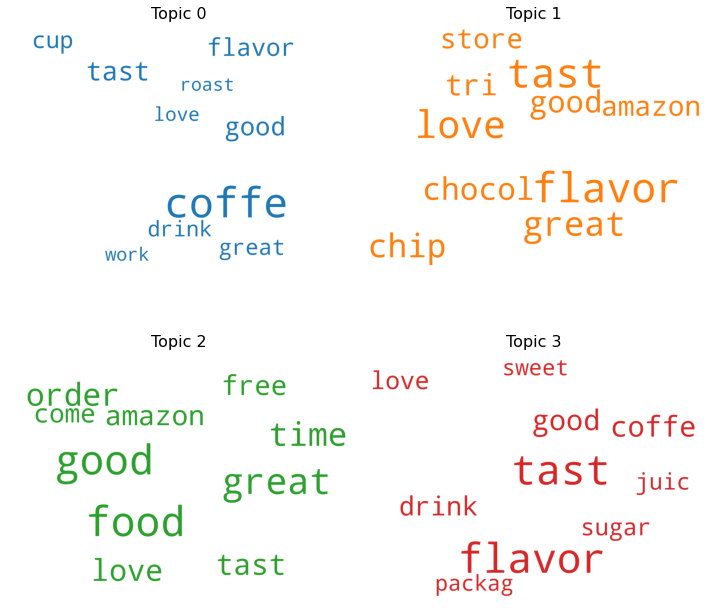

In [125]:
#  Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_',
                   'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice',
                   'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want',
                   'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
                  'like', 'taste', 'product', 'order'])

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [129]:
#visualize with pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.028857 -0.011734       1        1  23.074887
4     -0.099830  0.029096       2        1  17.138050
3      0.060105  0.039569       3        1  16.939886
1     -0.006999  0.009656       4        1  15.789404
0      0.025309  0.013346       5        1  15.036522
2     -0.007442 -0.079934       6        1  12.021251, topic_info=       Term         Freq        Total Category  logprob  loglift
246   coffe  4207.000000  4207.000000  Default  30.0000  30.0000
806    chip  1138.000000  1138.000000  Default  29.0000  29.0000
228  chocol  1048.000000  1048.000000  Default  28.0000  28.0000
319    milk   843.000000   843.000000  Default  27.0000  27.0000
787    juic  1117.000000  1117.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
156    pack   137.456392   956.560387   Topic6  -5.3327   0.1785
167    time   157.582382  1705.479334   Topic6  -5.1961  -0.2632
252   littl   150.457467  1439.527621   Topic6  -5.2423  -0.1399
126    want   141.108733  1121.910161   Topic6  -5.3065   0.0452
197  amazon   149.669711  1683.845974   Topic6  -5.2476  -0.3019

[398 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
263       1  0.142911   add
263       2  0.093686   add
263       3  0.311228   add
263       4  0.098450   add
263       5  0.255652   add
...     ...       ...   ...
457       2  0.159437  zero
457       3  0.478311  zero
457       4  0.113884  zero
457       5  0.068330  zero
457       6  0.091107  zero

[1621 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 4, 2, 1, 3])

# Running LDA using TF-IDF

In [124]:
# define LDA model using the TF-IDF dictionary
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary, passes=3, workers=3)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"food" + 0.009*"coffe" + 0.007*"love" + 0.006*"order" + 0.006*"amazon" + 0.006*"great" + 0.006*"time" + 0.006*"good" + 0.005*"cup" + 0.005*"flavor"
Topic: 1 Word: 0.008*"tast" + 0.008*"drink" + 0.008*"juic" + 0.008*"sugar" + 0.007*"flavor" + 0.007*"chip" + 0.007*"orang" + 0.007*"soda" + 0.007*"great" + 0.007*"love"
Topic: 2 Word: 0.011*"chocol" + 0.009*"tast" + 0.009*"flavor" + 0.008*"coffe" + 0.008*"good" + 0.008*"great" + 0.007*"love" + 0.006*"milk" + 0.006*"treat" + 0.005*"coconut"
Topic: 3 Word: 0.027*"coffe" + 0.011*"flavor" + 0.009*"roast" + 0.008*"cup" + 0.008*"tast" + 0.007*"good" + 0.007*"order" + 0.007*"great" + 0.006*"favorit" + 0.006*"bold"


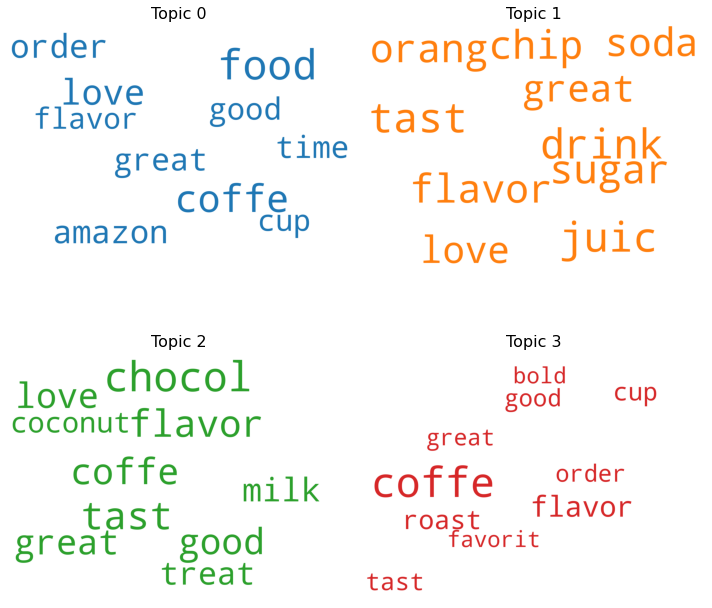

In [126]:
# Wordcloud of Top N words in each topic
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_',
                   'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice',
                   'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want',
                   'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
                  'like', 'taste', 'product', 'order'])

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics =lda_model_tfidf.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [127]:
#visualize with pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary=lda_model.id2word)
vis
# What are the differences between those two approaches ?
"""
TF-IDF is takes into account the nbr of docs a word appears in
BOW just counts occurences

also my number of topics is prob. wrong
"""

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.049884 -0.003855       1        1  28.932747
2      0.013929 -0.036584       2        1  24.849850
0      0.002830  0.048895       3        1  23.661087
3     -0.066643 -0.008456       4        1  22.556316, topic_info=       Term        Freq       Total Category  logprob  loglift
246   coffe  432.000000  432.000000  Default  30.0000  30.0000
407   roast   98.000000   98.000000  Default  29.0000  29.0000
228  chocol  147.000000  147.000000  Default  28.0000  28.0000
401  medium   61.000000   61.000000  Default  27.0000  27.0000
48     soda   95.000000   95.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
197  amazon   41.078940  155.630375   Topic4  -5.3257   0.1572
54    price   41.627127  163.835175   Topic4  -5.3125   0.1190
78     love   45.268622  250.907445   Topic4  -5.2286  -0.2233
167    time   38.889025  162.807821   Topic4  -5.3805   0.0573
150     tri   37.595847  173.120633   Topic4  -5.4143  -0.0379

[291 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
263       1  0.519613     add
263       2  0.199851     add
263       3  0.173204     add
263       4  0.106587     add
446       1  0.686543  altern
...     ...       ...     ...
152       4  0.190580    year
1218      1  0.087534   yuban
1218      2  0.175068   yuban
1218      3  0.087534   yuban
1218      4  0.700271   yuban

[832 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

# Performance evaluation by classifying sample document using LDA Bag of Words model

In [23]:
# vusualize a document
processed_docs[420]

H:\Programmes\Ancaconda\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['expect',
 'like',
 'cooki',
 'like',
 'chocol',
 'chip',
 'cooki',
 'prefer',
 'soft',
 'cooki',
 'crisp',
 'one',
 'famous',
 'amo',
 'cooki',
 'pertti',
 'turn',
 'cooki',
 'rich',
 'depth',
 'flavor',
 'come',
 'qualiti',
 'ingredi',
 'chip',
 'real',
 'chocol',
 'melt',
 'redilli',
 'mouth',
 'creat',
 'moist',
 'experi',
 'chew',
 'truli',
 'great',
 'cooki']

In [130]:
# visualize the performance of the LDA model on the Bag of Words
for index, score in sorted(lda_model[bow_corpus[420]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))



Score: 0.8027383089065552	 
Topic: 0.026*"tast" + 0.024*"love" + 0.021*"good" + 0.017*"great" + 0.017*"flavor" + 0.014*"order" + 0.011*"food" + 0.011*"time" + 0.010*"amazon" + 0.008*"tri"

Score: 0.17555886507034302	 
Topic: 0.044*"flavor" + 0.025*"chip" + 0.017*"tast" + 0.015*"good" + 0.010*"coffe" + 0.010*"vanilla" + 0.009*"love" + 0.008*"food" + 0.008*"salt" + 0.007*"time"


 The test document has the highest probability to be part of the topic that the model assigned, which is the accurate classification.

# Performance evaluation by classifying sample document using LDA TF-IDF model

In [132]:
# visualize the performance of the LDA model on the TF-IDF dictionary
for index, score in sorted(lda_model_tfidf[bow_corpus[420]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9743207097053528	 
Topic: 0.011*"chocol" + 0.009*"tast" + 0.009*"flavor" + 0.008*"coffe" + 0.008*"good" + 0.008*"great" + 0.007*"love" + 0.006*"milk" + 0.006*"treat" + 0.005*"coconut"


# Testing model on unseen document

In [133]:
# define and test an unseen document, what can you observe ?
# merci amazon
unseen_document = """I ordered 2 different OREO biscuit chips with different prices,
but they come exactly the same.One of them's package is broken and open, some oreos are spiled out.
DISGUSTING. Dont even mention the taste, it tastes like expired."""

bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))
    
"""
The classification works. The classifier also correctly "guessed" that the unseen_document was an amazon review
"""

Score: 0.6263992190361023	 Topic: 0.026*"tast" + 0.024*"love" + 0.021*"good" + 0.017*"great" + 0.017*"flavor" + 0.014*"order" + 0.011*"food" + 0.011*"time" + 0.010*"amazon" + 0.008*"tri"
Score: 0.3400116562843323	 Topic: 0.044*"flavor" + 0.025*"chip" + 0.017*"tast" + 0.015*"good" + 0.010*"coffe" + 0.010*"vanilla" + 0.009*"love" + 0.008*"food" + 0.008*"salt" + 0.007*"time"


In [134]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [135]:
# Working & Scoring
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [136]:
sent = "DISGUSTING. Dont even mention the taste, it tastes like expired"
sentiment_analyzer_scores(sent)
éééééééééééééééé'🤔'

DISGUSTING. Dont even mention the taste, it tastes like expired {'neg': 0.282, 'neu': 0.547, 'pos': 0.171, 'compound': -0.3885}


In [137]:
def vader_s_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score
# mapping the sentiment analyser to the df

# sentiment_df = df[['Id', 'Text']]
# sentiment_df["s_score"] = sentiment_df['Text'].map(vader_s_scores)

sentiment_df["neg"] = sentiment_df['s_score'].apply(lambda x: x.get('neg'))
sentiment_df["neu"] = sentiment_df['s_score'].apply(lambda x: x.get('neu'))
sentiment_df["pos"] = sentiment_df['s_score'].apply(lambda x: x.get('pos'))
sentiment_df["compound"] = sentiment_df['s_score'].apply(lambda x: x.get('compound'))

sentiment_df
sentiment_df[["neg","neu","pos","compound"]].describe()
#-> globalement les commmentaires sont positifs selon vader

,neg,neu,pos,compound
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.038758,0.775662,0.185577,0.658721
std,0.048297,0.096195,0.101375,0.455475
min,0.000000,0.313000,0.000000,-0.990300
25%,0.000000,0.715000,0.113000,0.603150
50%,0.025000,0.785000,0.174000,0.857950
75%,0.060000,0.843000,0.250000,0.941200
max,0.352000,1.000000,0.687000,0.999700
